# Lecture 6: The Maximum Entropy Principle

## Objectives

+ Demonstrate the maximum entropy principle through some examples

## Maximum Entropy of 2-state Distribution

Consdider a distribution with two states, say $0$ and $1$.
If the probability of $0$ is $p$, then the entropy of the distribution is:
$$
H_2(p, 1-p) = -p\log p - (1-p)\log (1-p)
$$
Let's plot this with respect to p.

In [1]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
p = np.linspace(0, 1, 100)
H = -p * np.log(p) - (1. - p) * np.log(1. - p)
ax.plot(p, H)
ax.set_xlabel('$p$')
ax.set_ylabel('$H_2(p, 1-p)$')

/Users/ibilion/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log
/Users/ibilion/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in multiply


## The Brandeis Dice Problem
This is from the 1962 Brandeis lectures of E. T. Jaynes.

> When a die is tossed, the number of spots up can have any value $i$ in $1\le i \le 6$. Suppose a die has been tossed $N$ times and we are told only that the average number of spots up was not $3.5$ as we might expect from an "honest" but 4.5. Given this information, <u>and nothing else</u>, what probability should we assign to $i$ spots on the next toss?

The data impose the following mean value constraint:
$$
\sum_{i=1}^6 i p_i = 4.5.
$$

The partition function is:
$$
Z(\lambda) = \sum_{i}e^{-\lambda i} = e^{-\lambda} + e^{-2\lambda} + \dots + e^{-6\lambda},
$$
or
$$
Z(\lambda) = \left(e^{-\lambda}\right)^1+\left(e^{-\lambda}\right)^2 + \dots + \left(e^{-\lambda}\right)^6,
$$
which is equal to:
$$
Z(\lambda) = \frac{e^{-\lambda}\left(1-e^{-6\lambda}\right)}{1 - e^{-\lambda}}.
$$

In order to find $\lambda$, we must solve:
$$
-\frac{\partial Z}{\partial \lambda} = 4.5.
$$
This becomes:
$$
\frac{1 - 7e^{-6\lambda} + 6e^{7\lambda}}{(1 - e^{-\lambda})(1 - e^{-6\lambda})} = 4.5,
$$
or
$$
3\left(e^{-\lambda}\right)^7 - 5 \left(e^{-\lambda}\right)^6 + 9e^{-\lambda} - 7 = 0.
$$
Let's solve this numerically.

In [2]:
from scipy.optimize import brentq
import numpy as np
import math

# x = exp(-lambda)
def f(x):
    return 3. * x ** 7 - 5 * x ** 6 + 9. * x - 7.

# Left bound for x
a = 0.
# Right bound for x
b = 10.
x = brentq(f, a, b)
lam = -math.log(x)
print 'Lambda:', lam
# Evaluate the partition function at this lambda
Z = math.exp(-lam) * (1. - math.exp(-6 * lam)) / (1. - math.exp(-lam))
print 'Z:', Z
# The log of Z
log_Z = math.log(Z)
print 'log Z:', log_Z
# The maximum entropy probabilities
p = np.exp(-lam * np.arange(1, 7)) / Z
print 'p: ', p 
# The entropty of this distribution is:
S = log_Z + lam * 4.5
print 'S:', S

Lambda: -0.371048938081
Z: 26.6636527973
log Z: 3.28330131952
p:  [ 0.05435317  0.07877155  0.11415998  0.1654468   0.23977444  0.34749407]
S: 1.61358109815


<Container object of 6 artists>

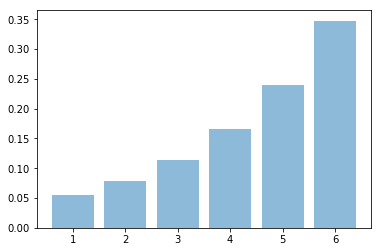

In [3]:
# Let's plot this:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(np.arange(1, 7), p, alpha=0.5)

## Questions
+ Repeat the analysis for a mean of 3.5.

+ Repeat the analysis for a mean of $1.5$.

+ Repeat assuming that we now know that the second moment is 2.6.